In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import os

In [4]:
np.random.seed(42)

In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [8]:
from tensorflow import keras

In [9]:
tf.__version__

'2.3.1'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full.dtype

dtype('uint8')

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

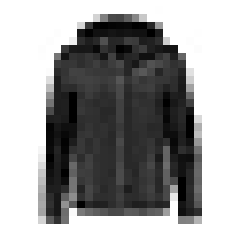

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]

'Coat'

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

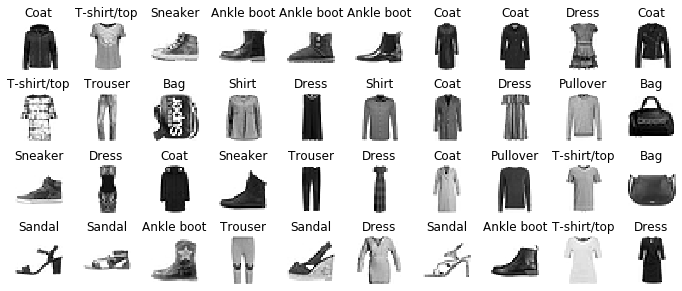

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
keras.backend.clear_session()
np.random.seed(42)

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
model.get_layer(hidden1.name) is hidden1

True

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
weights

array([[-0.04386651,  0.00566893,  0.03203989, ..., -0.04123368,
         0.02675709, -0.03671438],
       [ 0.00375409, -0.06334314,  0.03377454, ...,  0.06379673,
         0.03672032,  0.01579611],
       [-0.01056791,  0.0576764 , -0.04141805, ..., -0.06724641,
        -0.01336125, -0.04507742],
       ...,
       [ 0.04167081,  0.05264147,  0.00748184, ...,  0.01165535,
         0.05373457, -0.02385667],
       [-0.06679673,  0.07230739,  0.06594156, ..., -0.07075046,
         0.00977249,  0.05394161],
       [-0.03027007, -0.06460783, -0.01285923, ..., -0.00302086,
         0.03443528, -0.01273017]], dtype=float32)

In [31]:
weights.shape

(784, 300)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7106 - accuracy: 0.7677 - val_loss: 0.5127 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4882 - accuracy: 0.8293 - val_loss: 0.4435 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4441 - accuracy: 0.8437 - val_loss: 0.4256 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4175 - accuracy: 0.8523 - val_loss: 0.4085 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3978 - accuracy: 0.8602 - val_loss: 0.3996 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3812 - accuracy: 0.8661 - val_loss: 0.3994 - val_accuracy: 0.8602
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3677 - accuracy: 0.8697 - val_loss: 0.4031 - val_accuracy:

In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [37]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

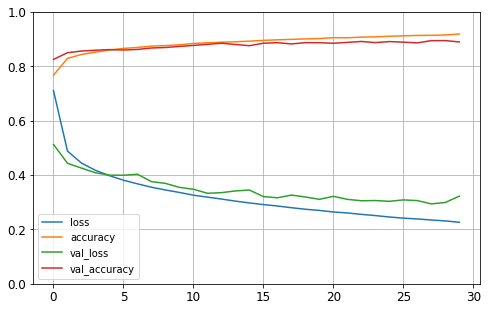

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 845us/step - loss: 0.3534 - accuracy: 0.8791


[0.3534001111984253, 0.8791000247001648]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

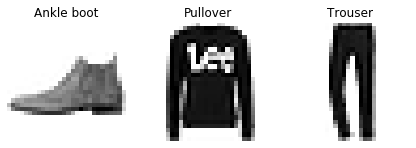

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# EXERCICES

# 1) Plot Learning curves when using different optimizers¶


ADAM

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [47]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8623 - val_loss: 0.4175 - val_accuracy: 0.8436
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.8767 - val_loss: 0.3325 - val_accuracy: 0.8814
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3066 - accuracy: 0.8865 - val_loss: 0.3498 - val_accuracy: 0.8712
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2910 - accuracy: 0.8926 - val_loss: 0.3359 - val_accuracy: 0.8782
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.8981 - val_loss: 0.3232 - val_accuracy: 0.8824
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9025 - val_loss: 0.3119 - val_accuracy: 0.8944
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2546 - accuracy: 0.9048 - val_loss: 0.2944 - val_accuracy:

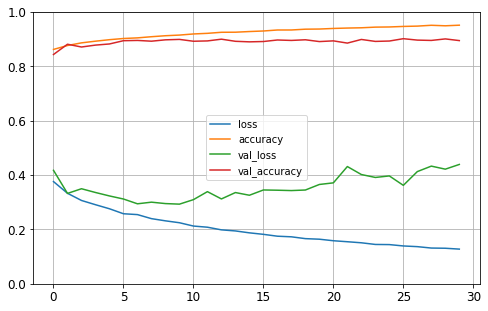

In [48]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Nadam

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [50]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9524 - val_loss: 0.4594 - val_accuracy: 0.8974
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1171 - accuracy: 0.9548 - val_loss: 0.4855 - val_accuracy: 0.8954
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1136 - accuracy: 0.9571 - val_loss: 0.4784 - val_accuracy: 0.8980
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9578 - val_loss: 0.4667 - val_accuracy: 0.8956
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1096 - accuracy: 0.9575 - val_loss: 0.4769 - val_accuracy: 0.9004
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1058 - accuracy: 0.9596 - val_loss: 0.5012 - val_accuracy: 0.9016
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1038 - accuracy: 0.9602 - val_loss: 0.4981 - val_accuracy:

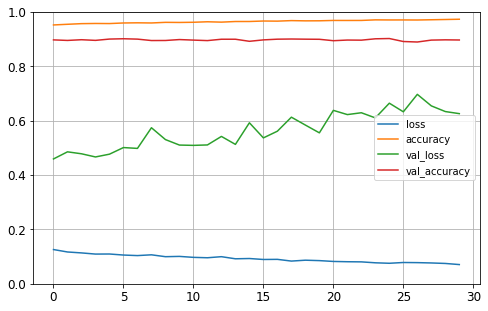

In [51]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 2) Plot Learning curves when using different batch size¶


Epoch 1/30
2750/2750 [==============================] - 7s 3ms/step - loss: 0.1050 - accuracy: 0.9632 - val_loss: 0.6563 - val_accuracy: 0.8950
Epoch 2/30
2750/2750 [==============================] - 7s 2ms/step - loss: 0.0885 - accuracy: 0.9673 - val_loss: 0.6780 - val_accuracy: 0.8962
Epoch 3/30
2750/2750 [==============================] - 7s 2ms/step - loss: 0.0910 - accuracy: 0.9663 - val_loss: 0.6799 - val_accuracy: 0.8912
Epoch 4/30
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0881 - accuracy: 0.9676 - val_loss: 0.6433 - val_accuracy: 0.8902
Epoch 5/30
2750/2750 [==============================] - 7s 2ms/step - loss: 0.0880 - accuracy: 0.9674 - val_loss: 0.6782 - val_accuracy: 0.8946
Epoch 6/30
2750/2750 [==============================] - 7s 2ms/step - loss: 0.0865 - accuracy: 0.9679 - val_loss: 0.6811 - val_accuracy: 0.8960
Epoch 7/30
2750/2750 [==============================] - 7s 2ms/step - loss: 0.0869 - accuracy: 0.9680 - val_loss: 0.6998 - val_accuracy:

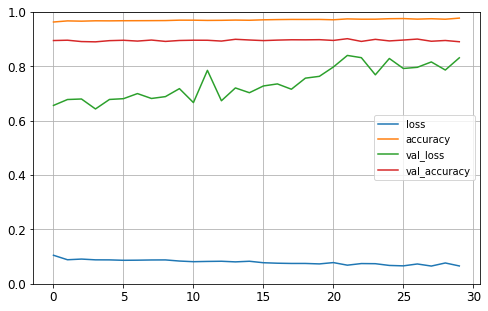

In [52]:
history4 = model.fit(X_train, y_train, batch_size=20, epochs=30,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 3) Plot Learning curves when using different number of epochs


Epoch 1/32
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0648 - accuracy: 0.9762 - val_loss: 0.9011 - val_accuracy: 0.8924
Epoch 2/32
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0646 - accuracy: 0.9763 - val_loss: 0.8728 - val_accuracy: 0.8974
Epoch 3/32
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0640 - accuracy: 0.9771 - val_loss: 0.8784 - val_accuracy: 0.9000
Epoch 4/32
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0630 - accuracy: 0.9770 - val_loss: 0.8392 - val_accuracy: 0.8966
Epoch 5/32
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0698 - accuracy: 0.9760 - val_loss: 0.9425 - val_accuracy: 0.8902
Epoch 6/32
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0650 - accuracy: 0.9769 - val_loss: 0.8994 - val_accuracy: 0.9002
Epoch 7/32
2750/2750 [==============================] - 7s 3ms/step - loss: 0.0658 - accuracy: 0.9766 - val_loss: 0.9032 - val_accuracy:

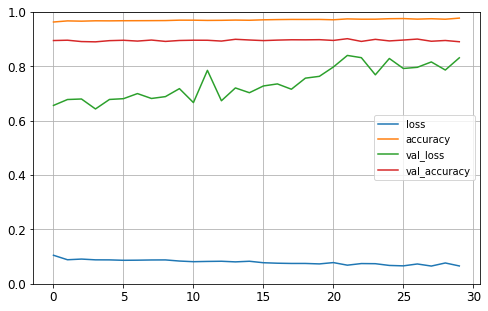

In [53]:
history5 = model.fit(X_train, y_train, batch_size=20, epochs=32,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 4) repeat with more layers¶


In [54]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(50, activation="tanh"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(20, activation="softmax"))

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [56]:
history6 = model.fit(X_train, y_train, batch_size=30, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.1633 - accuracy: 0.9656 - val_loss: 0.7750 - val_accuracy: 0.9018
Epoch 2/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0602 - accuracy: 0.9868 - val_loss: 0.8045 - val_accuracy: 0.9010
Epoch 3/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0571 - accuracy: 0.9869 - val_loss: 0.7232 - val_accuracy: 0.8964
Epoch 4/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0603 - accuracy: 0.9863 - val_loss: 0.7953 - val_accuracy: 0.9010
Epoch 5/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0666 - accuracy: 0.9857 - val_loss: 0.7409 - val_accuracy: 0.9006
Epoch 6/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0714 - accuracy: 0.9845 - val_loss: 0.6491 - val_accuracy: 0.8956
Epoch 7/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.0736 - accuracy: 0.9844 - val_loss: 0.7703 - val_accuracy:

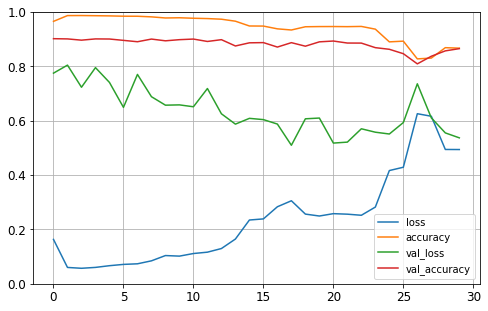

In [57]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5) apply on different datasets¶


In [74]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11493376/11490434 [==============================] - 8s 1us/step


In [76]:
X_train_full.shape


(60000, 28, 28)

In [77]:
X_train_full.dtype

dtype('uint8')

In [78]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

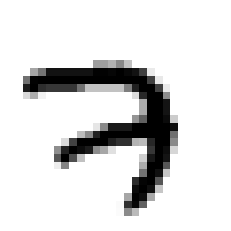

In [79]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [80]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [84]:
class_names = ["Zero","un", "deux", "trois", "quatre", "cinq","six", "sept", "huit", "neuf"]

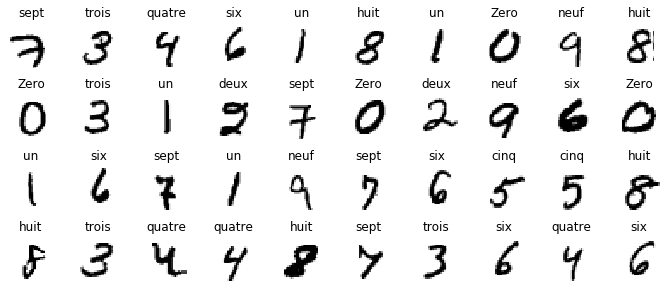

In [85]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [86]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [87]:
keras.backend.clear_session()
np.random.seed(42)

In [88]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [89]:
model.layers

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [91]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [92]:
model.get_layer(hidden1.name) is hidden1

True

In [93]:
weights, biases = hidden1.get_weights()

In [94]:
weights

array([[ 0.01761786,  0.01487523, -0.06837503, ...,  0.00038975,
        -0.05170678,  0.07209361],
       [-0.05383188,  0.01112827,  0.05574799, ...,  0.00975618,
        -0.06328485, -0.0565693 ],
       [ 0.03984687, -0.04087351,  0.0253757 , ..., -0.02339447,
         0.0012637 ,  0.06957816],
       ...,
       [-0.01935535, -0.01115729,  0.04089558, ..., -0.03549517,
         0.05971631, -0.01645369],
       [-0.00955372,  0.02355117, -0.06114861, ..., -0.06758647,
         0.00714415,  0.06195685],
       [-0.05062424,  0.01674773, -0.05703884, ..., -0.02066433,
        -0.04537036, -0.01871204]], dtype=float32)

In [95]:
weights.shape


(784, 300)

In [96]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [97]:
biases.shape

(300,)

In [98]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [99]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5948 - accuracy: 0.8455 - val_loss: 0.3029 - val_accuracy: 0.9176
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2800 - accuracy: 0.9190 - val_loss: 0.2395 - val_accuracy: 0.9298
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2271 - accuracy: 0.9346 - val_loss: 0.1994 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1934 - accuracy: 0.9442 - val_loss: 0.1737 - val_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1681 - accuracy: 0.9523 - val_loss: 0.1565 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1498 - accuracy: 0.9581 - val_loss: 0.1424 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1343 - accuracy: 0.9621 - val_loss: 0.1330 - val_accuracy:

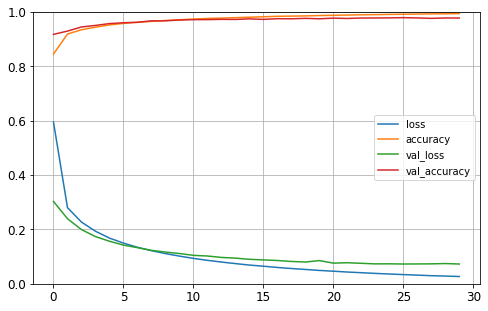

In [100]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [101]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 873us/step - loss: 0.0725 - accuracy: 0.9780


[0.0724799707531929, 0.9779999852180481]

In [102]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [103]:
y_pred = model.predict_classes(X_new)
y_pred

array([7, 2, 1])

In [104]:
np.array(class_names)[y_pred]

array(['sept', 'deux', 'un'], dtype='<U6')

In [105]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

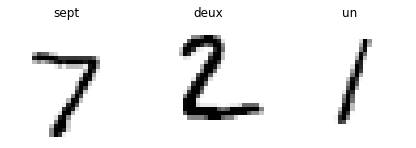

In [106]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()